In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
housing_data <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv")

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
bedrooms <- housing_data |>
            distinct(Number_Beds)
bedrooms

Number_Beds
<dbl>
3
2
4
1
0
6
5
7
8


In [4]:
one <- housing_data|>
       filter(Number_Beds == 1)|>
       nrow()
two <- housing_data|>
       filter(Number_Beds == 2)|>
       nrow()
three <- housing_data|>
       filter(Number_Beds == 3)|>
       nrow()
four <- housing_data|>
       filter(Number_Beds == 4)|>
       nrow()
five <- housing_data|>
       filter(Number_Beds == 5)|>
       nrow()
six <- housing_data|>
       filter(Number_Beds == 6)|>
       nrow()
one
two
three
four
five
six

[1] 2729

[1] 7724

[1] 10174

[1] 7831

[1] 4004

[1] 1581

In [5]:
housing_data <- housing_data|>
                filter(Number_Beds != 0)

In [6]:
housing_data <- housing_data |>
  mutate(Number_Beds_changed = case_when(
    Number_Beds <= 6 ~ as.character(Number_Beds),
    Number_Beds > 6 ~ "6+"
  )) |>
  mutate(Number_Beds_changed = as_factor(Number_Beds_changed))


In [7]:
city <- housing_data |>
        group_by(City, Number_Beds_changed, Number_Beds)|>
        summarize(Number_Beds = sum(Number_Beds))
city

`summarise()` has grouped output by 'City', 'Number_Beds_changed'. You can
override using the `.groups` argument.


City,Number_Beds_changed,Number_Beds
<chr>,<fct>,<dbl>
Abbotsford,3,390
Abbotsford,2,358
Abbotsford,4,568
Abbotsford,1,37
Abbotsford,6,522
Abbotsford,5,625
Abbotsford,6+,231
Abbotsford,6+,80
Abbotsford,6+,72


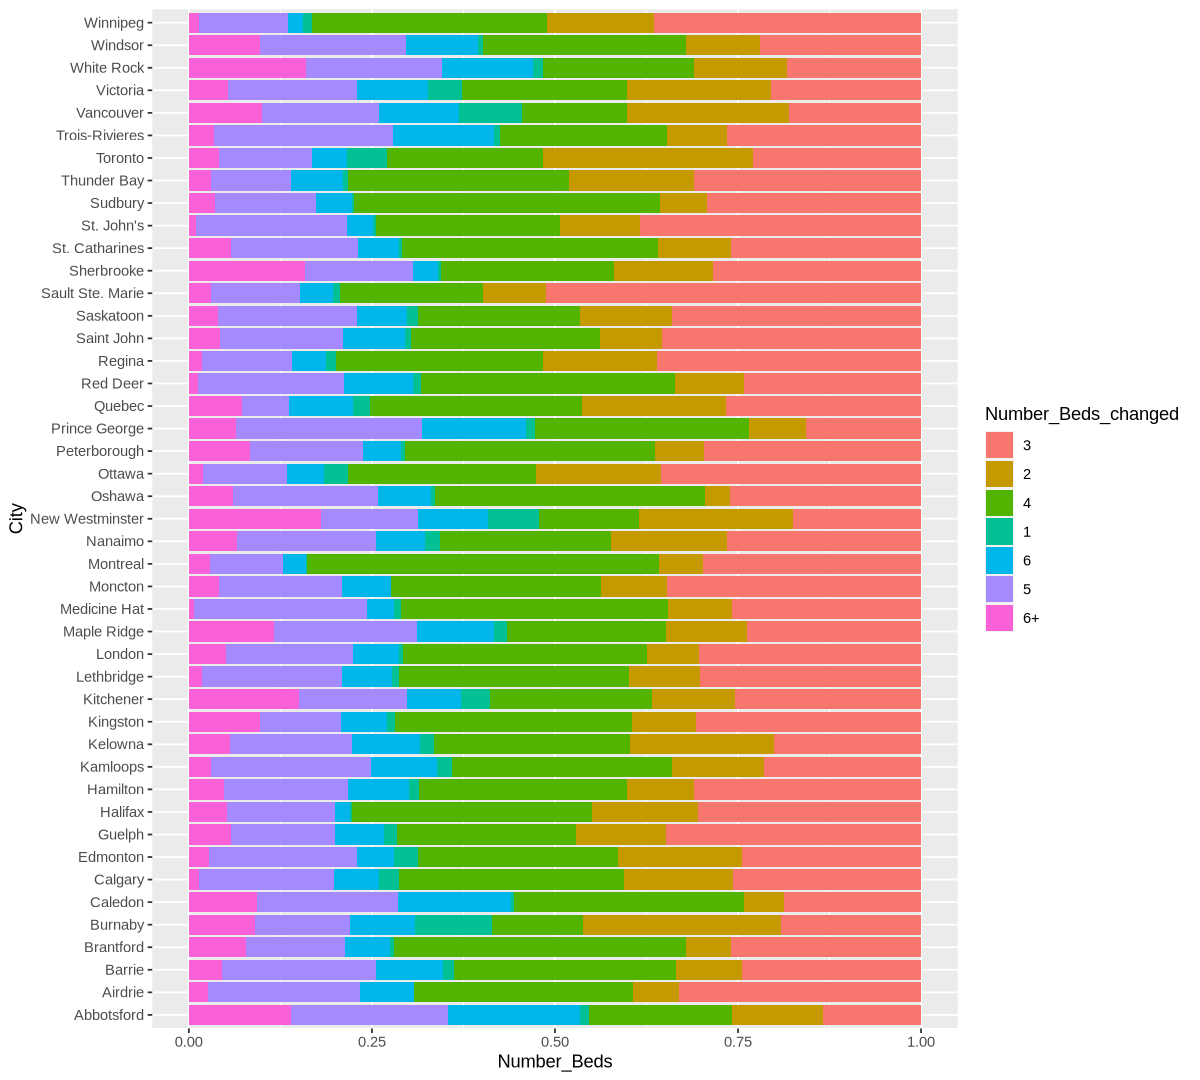

In [8]:
options(repr.plot.height = 9, repr.plot.width = 10)
comparison <- city|>
              ggplot(aes(y= City, x= Number_Beds, fill = Number_Beds_changed))+
              geom_bar(stat = "identity", position = "fill")
comparison